# Stock Price Prediction with Time Series Models

In this notebook we try to use some time series models to understand the problem of stock price prediction. As we shall see, predicting stock price is an extremely hard problem and there are reasons why no one is actually using the method we use in this notebook in actual 
trading. Despite of that, for a problem as complicated as stock price prediction, we should start simple, try the simple methods and then try to understand why these methods fail.  

We first import the packages we need for the problem. 

We shall use the pandas package for reading and manipulating with the stock price data (saved as csv files).

We use matplotlib and seaborn for data visulization.

and scikit-learn for machine learning models and training.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Stock price data

We use the data set from https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices for our project.

In [3]:
AMD=pd.read_csv("C:/Users/User/PythonCodes/data_folder/AMD (1980 -11.07.2023).csv",parse_dates=['Date'])
AMD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


Here is the daily stock price data for $AMD between 1980-03-18 to 2023-07-11. We notice that the open prices are not correct for the early dates.

One can check that the open price becomes correct after the date 1983-03-21

In [4]:
mask1=AMD['Open']>0
AMD[mask1].head()

,Date,Open,High,Low,Close,Adj Close,Volume
644,1982-10-05,4.43750,4.43750,4.43750,4.43750,4.43750,0
760,1983-03-21,8.96875,9.03125,8.81250,9.00000,9.00000,510800
761,1983-03-22,8.71875,8.96875,8.50000,8.50000,8.50000,328000
762,1983-03-23,8.50000,8.81250,8.46875,8.71875,8.71875,427200
763,1983-03-24,8.71875,8.78125,8.65625,8.78125,8.78125,393200


We also import the same price data for Intel  and $NVDA.

In [5]:
INTC=pd.read_csv("C:/Users/User/PythonCodes/data_folder/INTEL (1980 - 11.07.2023).csv",parse_dates=['Date'])
INTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.183718,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188162,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.187421,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.180754,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177050,8966400


In [6]:
NVDA=pd.read_csv("C:/Users/User/PythonCodes/data_folder/NVIDIA (1999 -11.07.2023).csv",parse_dates=['Date'])
NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200


One should notice that for $NVDA the data starts at the data 1999-01-25, since the company was established at early 1990s and went public in 1999.

We use the describe method to have a closer look at the price data.

In [7]:
AMD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04
mean,16.842664,17.510743,16.761635,17.138932,17.138932,1.846495e+07
std,23.317716,23.609612,22.615398,23.121619,23.121619,2.815631e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.960000,5.437500,5.125000,5.300000,5.300000,1.226100e+06
50%,9.875000,10.062500,9.630000,9.875000,9.875000,6.833200e+06
75%,16.125000,16.403125,15.805000,16.120001,16.120001,2.284015e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


Do the same thing for INTC and NVDA

In [8]:
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6.154000e+03
mean,34.055888,34.707315,33.394796,34.080465,33.818979,6.120887e+07
std,67.420090,68.760909,66.069289,67.472837,67.479411,4.385313e+07
min,0.348958,0.355469,0.333333,0.341146,0.313002,1.968000e+06
25%,2.682084,2.768125,2.612500,2.685417,2.463874,3.443320e+07
50%,4.371250,4.443750,4.280000,4.367500,4.024390,5.136085e+07
75%,33.498124,34.356876,32.490626,33.403123,33.137190,7.449690e+07
max,435.010010,439.899994,426.739990,438.079987,438.079987,9.230856e+08


In [9]:
INTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04
mean,19.897342,20.169676,19.627548,19.896781,14.668655,5.052754e+07
std,17.487968,17.729974,17.252020,17.487397,14.781238,3.481933e+07
min,0.218750,0.218750,0.216146,0.216146,0.122972,0.000000e+00
25%,1.343750,1.367188,1.320313,1.343750,0.764502,2.713025e+07
50%,20.350000,20.650000,20.093750,20.370001,12.680091,4.450540e+07
75%,30.115001,30.593750,29.670000,30.066250,19.987983,6.467910e+07
max,75.625000,75.828125,73.625000,74.875000,63.348770,5.677088e+08


# EDA and data visualization

In [10]:
AMD.isnull().sum() #check if there are missing values in the data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
INTC.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
NVDA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Plotting historical prices
We now plot the historical prices for the three stocks.

In [18]:
AMD['Date']=pd.to_datetime(AMD['Date'])
AMD.set_index('Date', inplace=True)

if isinstance(AMD.index, pd.PeriodIndex):
    AMD.index = AMD.index.to_timestamp()
# Display the dataframe to check the changes
print(AMD.head())
print(AMD.index)  # Check the index type

            Open      High       Low     Close  Adj Close  Volume
Date                                                             
1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200
1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200
1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600
1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800
1980-03-24   0.0  2.916667  2.635417  2.666667   2.666667  436800
DatetimeIndex(['1980-03-18', '1980-03-19', '1980-03-20', '1980-03-21',
               '1980-03-24', '1980-03-25', '1980-03-26', '1980-03-27',
               '1980-03-28', '1980-03-31',
               ...
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10'],
              dtype='datetime64[ns]', name='Date', length=10919, freq=None)


In [200]:
INTC['Date']=pd.to_datetime(INTC['Date'])
INTC.set_index('Date', inplace=True)

if isinstance(INTC.index, pd.PeriodIndex):
    INTC.index = INTC.index.to_timestamp()
# Display the dataframe to check the changes
print(INTC.head())
print(INTC.index)  # Check the index type

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1980-03-18  0.325521  0.328125  0.322917  0.322917   0.183718  17068800
1980-03-19  0.330729  0.335938  0.330729  0.330729   0.188162  18508800
1980-03-20  0.330729  0.334635  0.329427  0.329427   0.187421  11174400
1980-03-21  0.322917  0.322917  0.317708  0.317708   0.180754  12172800
1980-03-24  0.316406  0.316406  0.311198  0.311198   0.177050   8966400
DatetimeIndex(['1980-03-18', '1980-03-19', '1980-03-20', '1980-03-21',
               '1980-03-24', '1980-03-25', '1980-03-26', '1980-03-27',
               '1980-03-28', '1980-03-31',
               ...
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10'],
              dtype='datetime64[ns]', name='Date', length=10919, freq=None)


In [201]:
NVDA['Date']=pd.to_datetime(NVDA['Date'])
NVDA.set_index('Date', inplace=True)

if isinstance(NVDA.index, pd.PeriodIndex):
    NVDA.index = NVDA.index.to_timestamp()

We can draw the historical prices of the three stocks in one figure to compare.

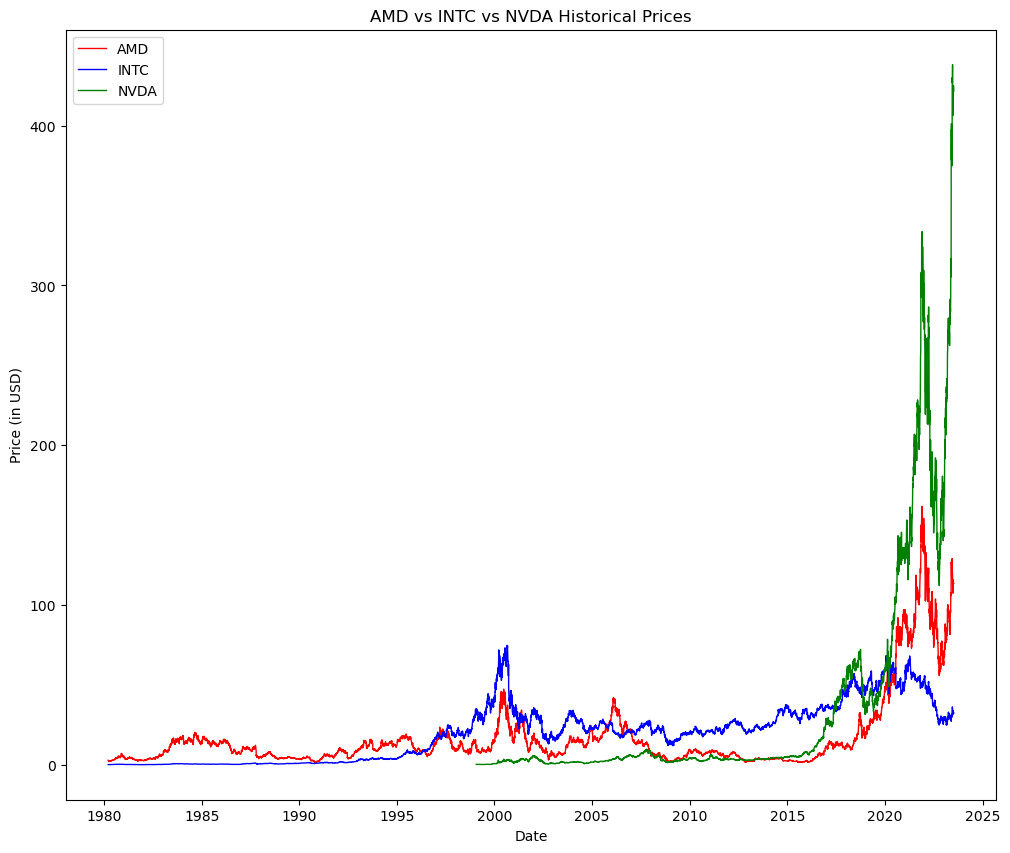

In [204]:
date = AMD.index
date2=NVDA.index
plt.plot(date,AMD['Close'], color='r', label='AMD',linewidth=1)
plt.plot(date,INTC['Close'], color='blue', label='INTC',linewidth=1)
plt.plot(date2,NVDA['Close'], color='green', label='NVDA',linewidth=1)
plt.xlabel("Date") 
plt.ylabel("Price (in USD)") 
plt.title("AMD vs INTC vs NVDA Historical Prices") 
plt.legend()
plt.show()

We then draw the historical price and volume charts of the three stocks, for which we conviently define a function for plotting the historical prices and volumes, which is similar to the function defined in https://www.kaggle.com/code/dekomorisanae09/market-share-analysis-of-nvidia-amd-intel

In [70]:
def plot(data, stock):

    fig, ax1 = plt.subplots(figsize=(20, 8))

    ax2 = ax1.twinx()
    ax1.bar(x=data.Date, height=data.Volume,alpha=0.7)
    ax2.plot(data.Date, data["Close"],'green')

    plt.title(f'Volume and Market Price ({stock})')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Volume', color='b')
    ax2.set_ylabel('Close Price', color='green');

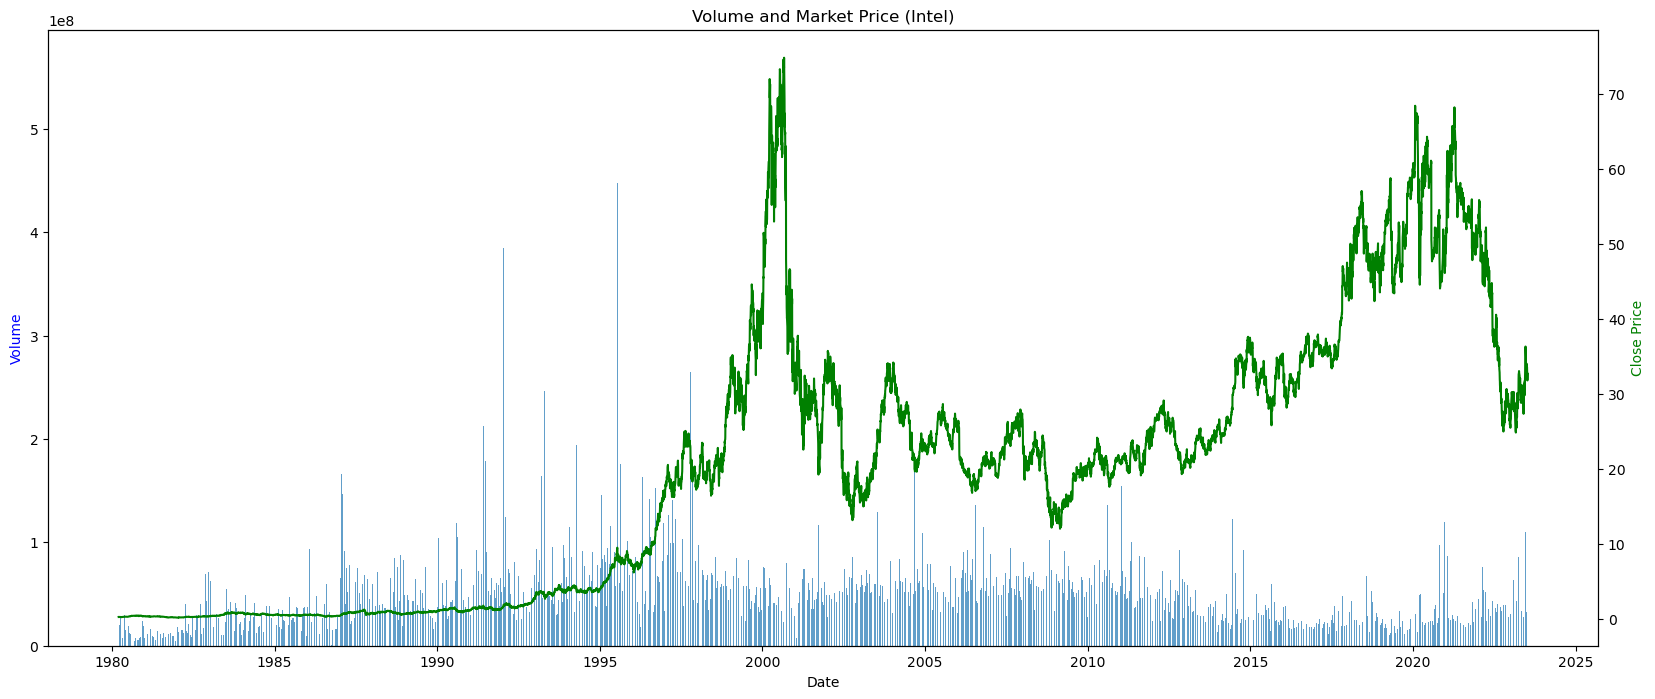

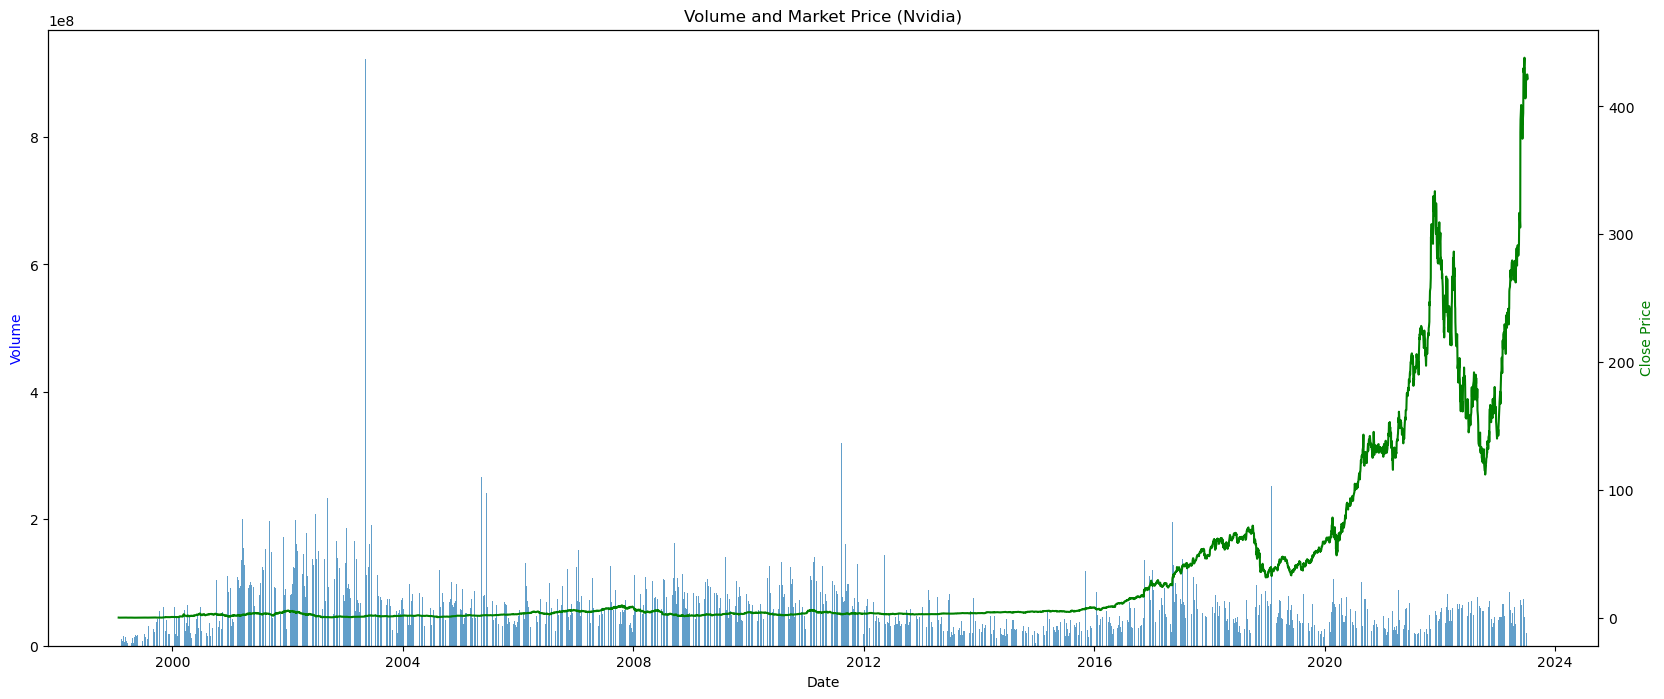

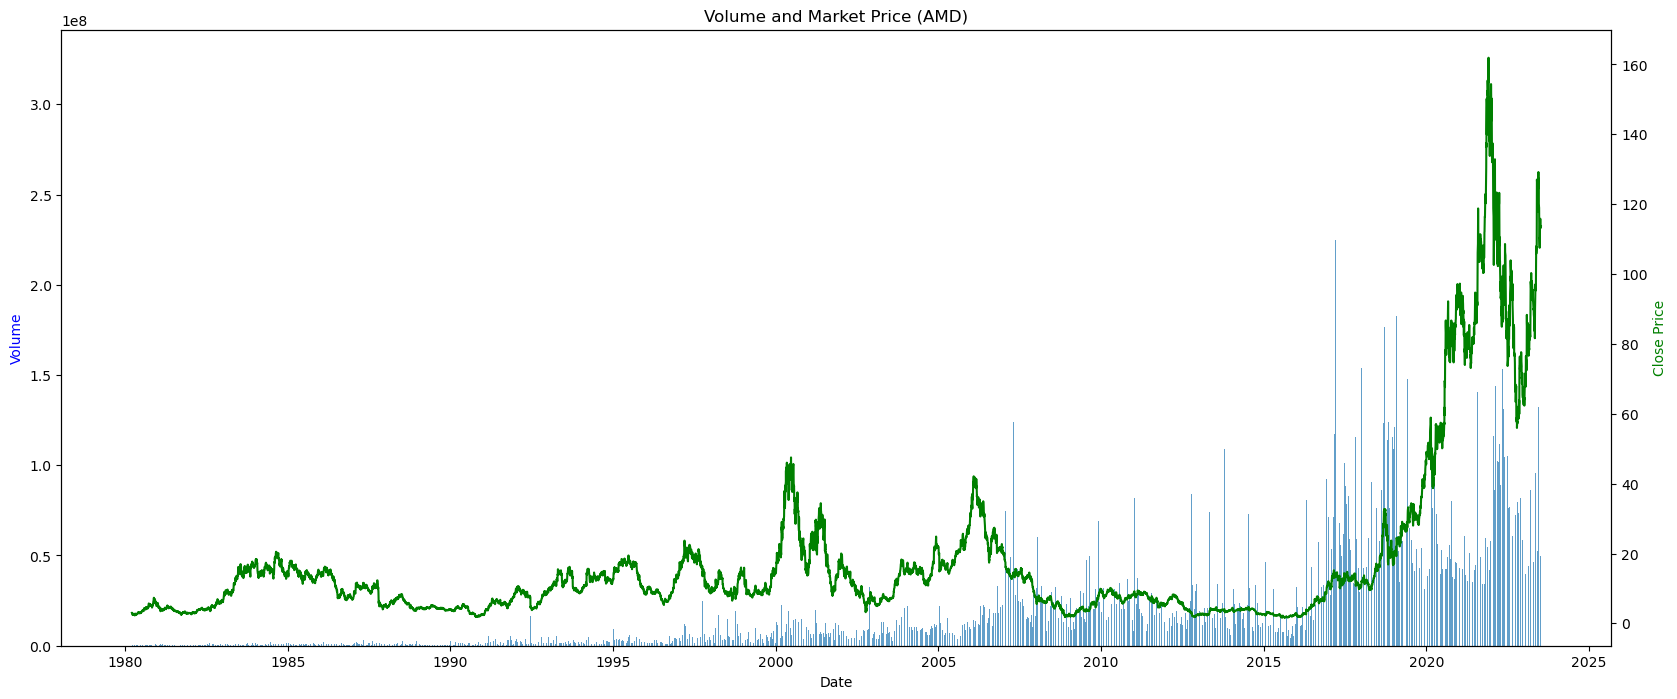

In [71]:
plot(INTC,'Intel')
plot(NVDA,'Nvidia')
plot(AMD,'AMD')

We observe that there seems to be a strong positive correlation between the prices of AMD and NVDA.

In [244]:
merged_df=pd.merge(AMD.iloc[:,4],NVDA.iloc[:,4],how='inner',on="Date")
merged_df.columns=['Close_AMD','Close_NVDA']

<AxesSubplot:>

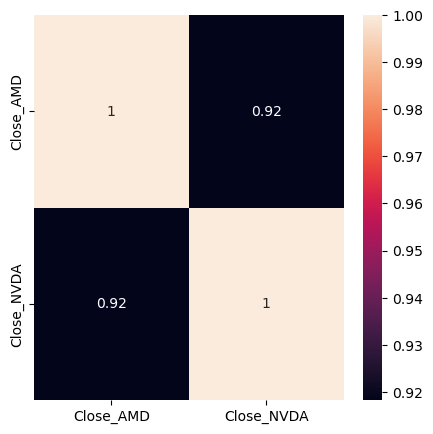

In [81]:
corr=merged_df.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True)

Indeed, we see a rather strong correlation between the close prices for NVDA and AMD.

# Prediction with time series model

Now let us tend to the problem of price prediction. By prediction we mean that we are trying to use the information we know from the past to predict the prices in the future. Therefore, one should refrain from using 'open','high', 'low' and 'volume' to predict the 'close' price, as such a model is hardly a prediction and completely misses the time-series nature of stock prices which is essential in the problem of price prediction.  

To keep things as simple as possible, let us try to train a model predicting the close prices of AMD using only the close prices of AMD in the past. We first create a time series of close prices of $AMD.

In [19]:
AMD_Close=AMD['Close']

## Naive forecast and mean forecast 
For time series, there are some naive models for prediction, which are the mean_forecast, naive_forecast and seasonal naive forecast models, let us try some of these methods.
Since it does not make much sense for these methods to use data far in the past, we pick a rather short range of time to train and predict the prices, say between 2020-01-01 and 2020-12-31, and we want to predict the prices for next 20 days.

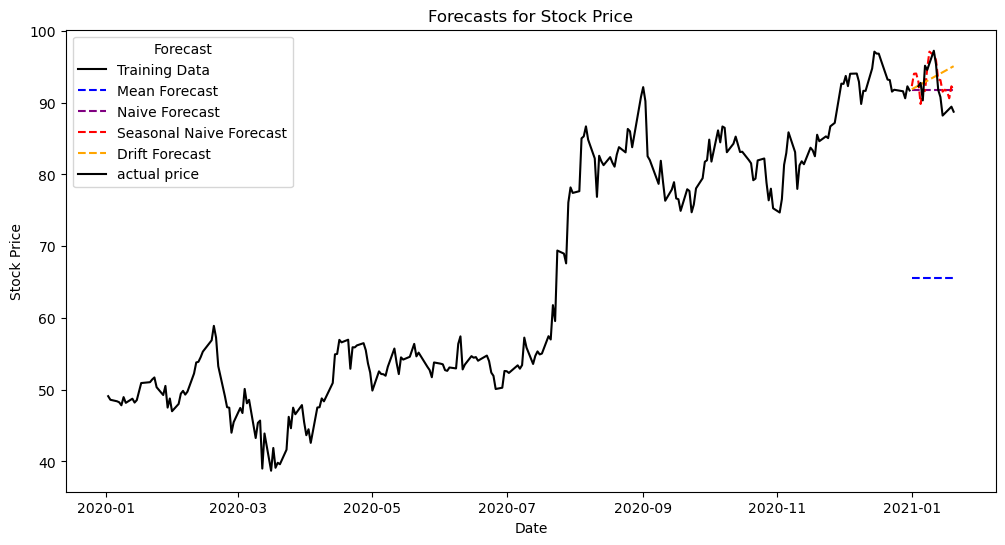

In [226]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
train_data = AMD_Close['2020-01-01':'2020-12-31']

# Forecasting horizon
h = 20  # Forecasting for the next 10 days

# Mean Forecast
mean_forecast = train_data.mean()
mean_forecast_series = pd.Series([mean_forecast] * h, index=pd.date_range(start='2021-01-01', periods=h, freq='D'))

# Naive Forecast
naive_forecast = pd.Series([train_data.iloc[-1]] * h, index=pd.date_range(start='2021-01-01', periods=h, freq='D'))

# Seasonal Naive Forecast (assuming daily data with seasonality of 20 days)
seasonal_naive_forecast = train_data[-20:]
seasonal_naive_forecast = pd.concat([seasonal_naive_forecast] )[:h]
seasonal_naive_forecast.index = pd.date_range(start='2021-01-01', periods=h, freq='D')

# Drift Model Forecast
# The drift model projects the trend observed in the historical data
slope = (train_data.iloc[-1] - train_data.iloc[0]) / (len(train_data) - 1)
drift_forecast = [train_data.iloc[-1] + slope * i for i in range(1, h + 1)]
drift_forecast_series = pd.Series(drift_forecast, index=pd.date_range(start='2021-01-01', periods=h, freq='D'))

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='black')
plt.plot(mean_forecast_series, label='Mean Forecast', linestyle='--', color='blue')
plt.plot(naive_forecast, label='Naive Forecast', linestyle='--', color='purple')
plt.plot(seasonal_naive_forecast, label='Seasonal Naive Forecast', linestyle='--', color='red')
plt.plot(drift_forecast_series, label='Drift Forecast', linestyle='--', color='orange')
plt.plot(AMD_Close['2021-01-01':'2021-01-20'],label='actual price', linestyle='-',color='black')

plt.title('Forecasts for Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(title='Forecast')
plt.show()

## Evualtion of the model

we compute the rediduals and calculate the error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE) for each model. 

In [106]:
# Compute Residuals
mean_residuals = train_data[-h:] - mean_forecast_series[:len(train_data[-h:])]
naive_residuals = train_data[-h:] - naive_forecast[:len(train_data[-h:])]
seasonal_naive_residuals = train_data[-h:] - seasonal_naive_forecast[:len(train_data[-h:])]
drift_residuals = train_data[-h:] - drift_forecast_series[:len(train_data[-h:])]

In [107]:
from statsmodels.tsa.stattools import acf

# Function to calculate accuracy metrics
def calculate_accuracy(forecast, actual):
    mae = np.mean(np.abs(forecast - actual))
    mse = np.mean((forecast - actual)**2)
    mape = np.mean(np.abs((forecast - actual) / actual)) * 100
    return mae, mse, mape

# Ensure we have actual data for the forecast period
actual = AMD_Close['2021-01-01':'2021-01-20']

# Calculate accuracy for each method
mean_mae, mean_mse, mean_mape = calculate_accuracy(mean_forecast_series, actual)
naive_mae, naive_mse, naive_mape = calculate_accuracy(naive_forecast, actual)
seasonal_naive_mae, seasonal_naive_mse, seasonal_naive_mape = calculate_accuracy(seasonal_naive_forecast, actual)
drift_mae, drift_mse, drift_mape = calculate_accuracy(drift_forecast_series, actual)

# Print accuracy metrics
print("Mean Forecast - MAE: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(mean_mae, mean_mse, mean_mape))
print("Naive Forecast - MAE: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(naive_mae, naive_mse, naive_mape))
print("Seasonal Naive Forecast - MAE: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(seasonal_naive_mae, seasonal_naive_mse, seasonal_naive_mape))
print("Drift Forecast - MAE: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(drift_mae, drift_mse, drift_mape))

Mean Forecast - MAE: 26.61, MSE: 715.58, MAPE: 28.79%
Naive Forecast - MAE: 2.35, MSE: 7.88, MAPE: 2.53%
Seasonal Naive Forecast - MAE: 1.88, MSE: 4.95, MAPE: 2.06%
Drift Forecast - MAE: 2.92, MSE: 12.61, MAPE: 3.21%


Not surprisingly, with these models, one can not do much better than naively predicting the price for tomorrow is the same as today. Let us now try a more complicated model.

## ARIMA Model 

ARIMA means autoregressive integrated moving average, which applies to stationary time series, which are usually not true for stock prices. Therefore, we need to check stationarity and try to make the series stationary by differencing.

In [45]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(AMD_Close)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
for key, value in adf_test[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.038405
p-value: 0.961595
Critical Values:
   1%, -3.4309305263569096
Critical Values:
   5%, -2.861796561294321
Critical Values:
   10%, -2.566906562466686


The p-value is too high to reject the null hypothesis, and we could not say the time series is stationary. We try differencing the series to make it stationary.

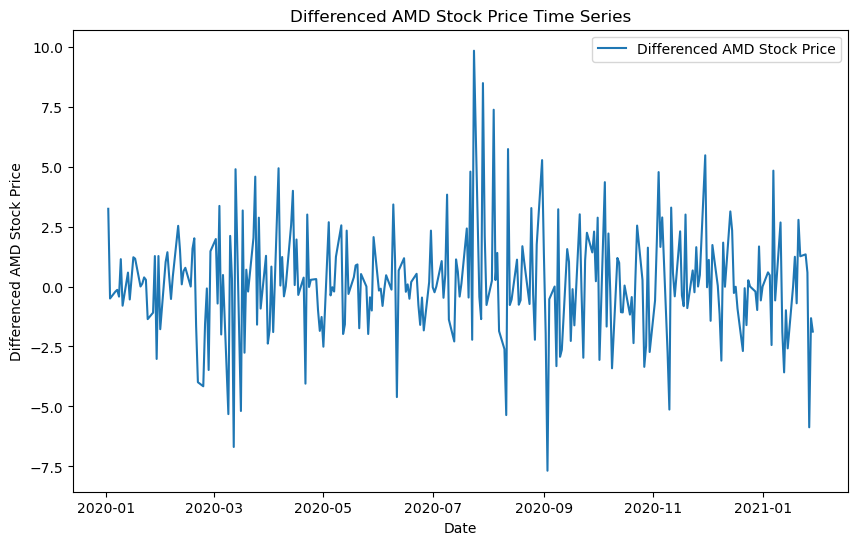

ADF Statistic: -19.134165
p-value: 0.000000
Critical Values:
   1%, -3.4538376962008495
Critical Values:
   5%, -2.8718811911083093
Critical Values:
   10%, -2.5722803076202174


In [46]:
# Differencing to make the series stationary
AMD_Close=AMD_Close['2020-01-01':'2021-1-31']
AMD_Close_diff = AMD_Close.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(AMD_Close_diff, label='Differenced AMD Stock Price')
plt.title('Differenced AMD Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced AMD Stock Price')
plt.legend()
plt.show()

# Check stationarity again
adf_test_diff = adfuller(AMD_Close_diff)
print('ADF Statistic: %f' % adf_test_diff[0])
print('p-value: %f' % adf_test_diff[1])
for key, value in adf_test_diff[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

The series now seems to be stationary. Next we need to determine the parameters for the ARIMA

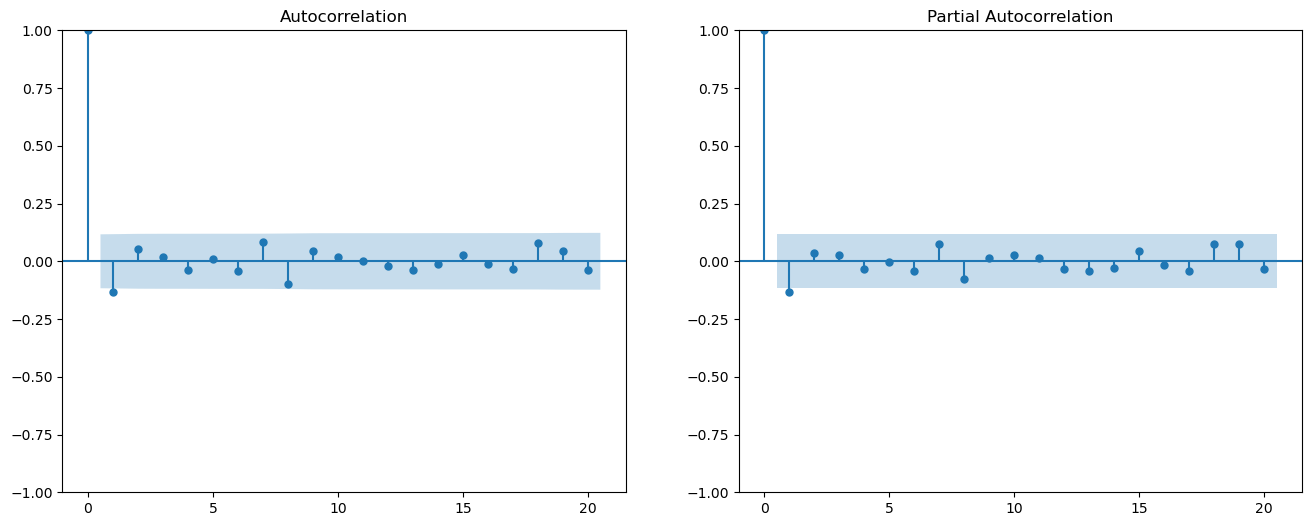

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(AMD_Close_diff, lags=20, ax=axes[0])
plot_pacf(AMD_Close_diff, lags=20, ax=axes[1],method='ywm')
plt.show()

It seems like we are in a situation where both acf and pacf decays fast, with only the nearest neighbor possibly have a correlation. We try different possiblities of (p,q,d).

Since there is trading happening at weekends, we set the freq of the time series with customBusinessDay.

In [48]:
from pandas.tseries.offsets import CustomBusinessDay
# Define custom business day frequency excluding weekends
custom_bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
AMD_Close=AMD_Close.asfreq(custom_bday)

There are still holidays which have NaN values, for those holidays we choose to fill the close price of the last trading day.

In [49]:
AMD_Close=AMD_Close.fillna(method='ffill')

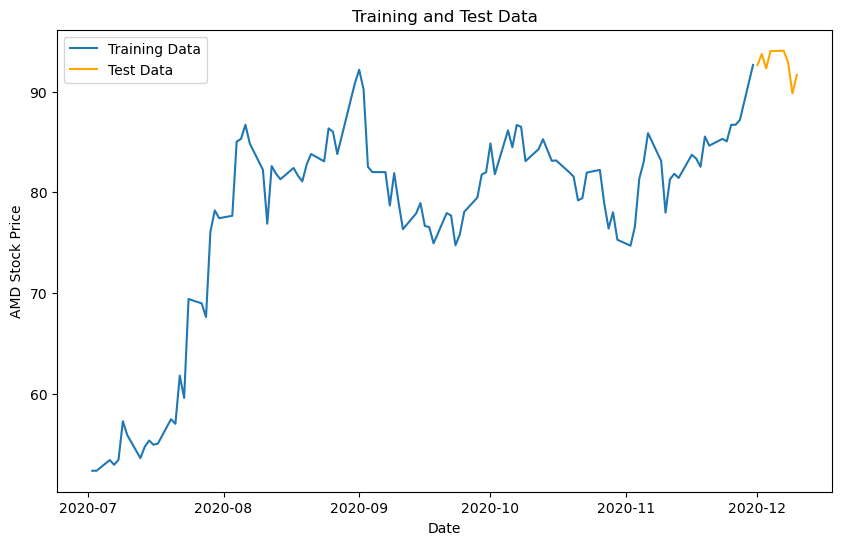

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  108
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -259.163
Date:                Sun, 09 Jun 2024   AIC                            520.326
Time:                        13:08:40   BIC                            522.998
Sample:                    07-02-2020   HQIC                           521.409
                         - 11-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.4358      0.731     10.171      0.000       6.003       8.869
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                17.25
Prob(Q):                              0.27   Pr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
from statsmodels.tsa.arima.model import ARIMA
# Split the data into training and test sets

# Set the training data period
train_data = AMD_Close['2020-07-02':'2020-11-30']  # Adjust this date as needed
test_data = AMD_Close['2020-12-01':'2020-12-10']  # Adjust this date as needed
# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.title('Training and Test Data')
plt.xlabel('Date')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

# Fit the ARIMA model (adjust p, d, q as needed)
model1 = ARIMA(train_data, order=(0, 1, 0))  # (p, d, q) order
model2 = ARIMA(train_data, order=(3, 1, 1))  # (p, d, q) order
model3 = ARIMA(train_data, order=(10, 1,10 ))  # (p, d, q) order
fitted_model1 = model1.fit()
fitted_model2 = model2.fit()
fitted_model3 = model3.fit()
# Print model summary
print(fitted_model1.summary())

In [88]:
# Make predictions
start_index = test_data.index[0]
end_index = test_data.index[-1]
predictions1 = fitted_model1.predict(start=start_index, end=end_index, dynamic=False)
predictions2 = fitted_model2.predict(start=start_index, end=end_index, dynamic=False)
predictions3 = fitted_model3.predict(start=start_index, end=end_index, dynamic=False)

## Model Evaulation
We could evualte the different ARIMA models using the mean suqared error and mean absolute error, which we import from sklearn.

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate performance metrics
mae1 = mean_absolute_error(test_data, predictions1)
rmse1 = np.sqrt(mean_squared_error(test_data, predictions1))
mae2 = mean_absolute_error(test_data, predictions2)
rmse2 = np.sqrt(mean_squared_error(test_data, predictions2))
mae3 = mean_absolute_error(test_data, predictions3)
rmse3 = np.sqrt(mean_squared_error(test_data, predictions3))

print(f"\nMean Absolute Error (MAE) of (0,1,0)ARIMA: {mae1:.2f}")
print(f"Root Mean Squared Error (RMSE) of (0,1,0)ARIMA: {rmse1:.2f}")
print(f"\nMean Absolute Error (MAE) of (3,1,1)ARIMA: {mae2:.2f}")
print(f"Root Mean Squared Error (RMSE) of (3,1,1)ARIMA: {rmse2:.2f}")
print(f"\nMean Absolute Error (MAE) of (10,1,10)ARIMA: {mae3:.2f}")
print(f"Root Mean Squared Error (RMSE) of (10,1,10)ARIMA: {rmse3:.2f}")


Mean Absolute Error (MAE) of (0,1,0)ARIMA: 1.04
Root Mean Squared Error (RMSE) of (0,1,0)ARIMA: 1.34

Mean Absolute Error (MAE) of (3,1,1)ARIMA: 1.40
Root Mean Squared Error (RMSE) of (3,1,1)ARIMA: 1.84

Mean Absolute Error (MAE) of (10,1,10)ARIMA: 1.31
Root Mean Squared Error (RMSE) of (10,1,10)ARIMA: 1.84


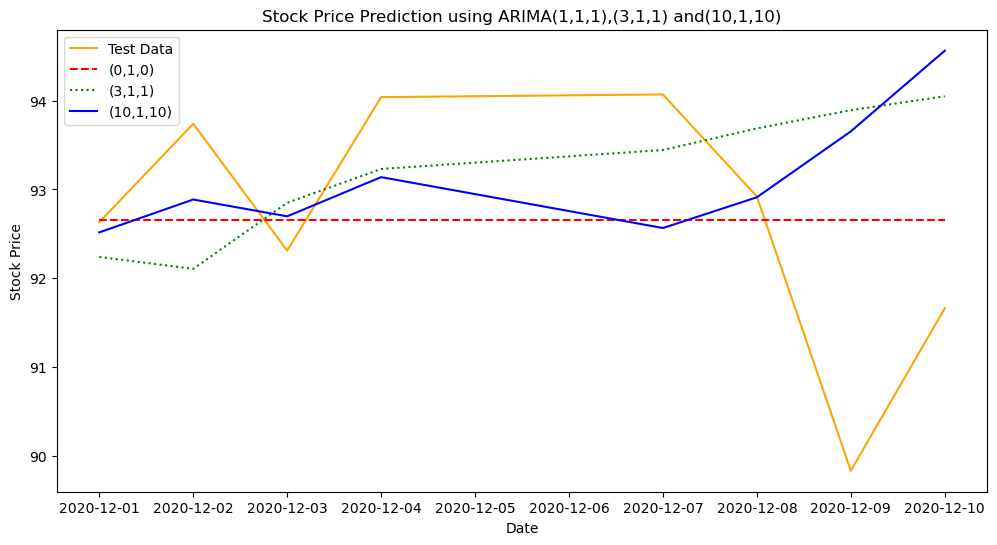

In [93]:
plt.figure(figsize=(12, 6))

plt.plot(test_data.index, test_data, label='Test Data', color='orange')
plt.plot(predictions1.index, predictions1, label='(0,1,0)', color='red', linestyle='--')
plt.plot(predictions2.index, predictions2, label='(3,1,1)', color='green', linestyle=':')
plt.plot(predictions3.index, predictions3, label='(10,1,10)', color='blue', linestyle='-')
plt.title('Stock Price Prediction using ARIMA(1,1,1),(3,1,1) and(10,1,10)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Among these models, the (0,1,0) model has the best performace, since ARIMA(0,1,0) is actually equivalent to the naive forecast, which assumes the price series is a random walk.

One can of course try to twerk the (p,q) parameters, but that adds the complexity of the model and will unlikely bring us more accurate results.

# Summary and Ideas

* We plot the historical prices of NVDA, AMD and INTC, and find a strong correlation between the prices of AMD and NVDA. 
* For the stock price prediction problem, if we only use the price data from the past, the ARIMA model does not give us more accurate predictions than the naive forecast.


Questions to answer in the future
* If we do not only use the historical price data, but also the volume data, could we make more precise predictions? 
* Even if we could not predict the price of an individual stock, could we still make a profit in the market? For example, can we develop a strategy using the correlation we observed between the prices of AMD and NVDA?
